In [9]:
import matplotlib.pyplot as plt
import numpy as np

### The LIF Model

#### A membrane equation and a reset condition define our leaky-integreate-and-fire (LIF) neuron:

\begin{align}
\tau_m\,\frac{d}{dt}\,V(t) &= E_{L} - V(t) + R\,I(t) &\text{if }\quad V(t) \leq V_{th} \\ \\
V(t) &= V_{reset} &\text{otherwise}
\end{align}


𝑉(𝑡)  => membrane potential

𝜏𝑚 =>  membrane time constant 

𝐸𝐿 => leak potential 

𝑅 => membrane resistance 

𝐼(𝑡) => synaptic input current

𝑉𝑡ℎ => firing threshold

𝑉𝑟𝑒𝑠𝑒𝑡 => reset voltage. 

𝑉𝑚 => membrane potential, which is more convenient for plot labels.

𝑉(𝑡) => response to synaptic input and leaking of charge across the cell membrane. 

ODE => ordinary differential equation

In [10]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


### Simulating Synaptic Input I(t)

\begin{equation}
I(t)=I_{mean}\left(1+\sin\left(\frac{2 \pi}{0.01}\,t\right)\right)
\end{equation}



$I_{mean}$ => mean current input 

$t$ => time.

In the next cell, you will compute the values of synaptic input $I(t)$ between $t=0$ and $t=0.009$ with step $\Delta t=0.001$.



In [20]:
# Loop for 10 steps, variable 'step' takes values from 0 to 9
for step in range(10):

    # Compute value of t
    t = step * dt

    # Compute value of i at this time step
    i = i_mean *(1+np.sin((2*np.pi/0.01)*t))

    # Print value of i
    print(i)


2.5e-10
3.969463130731183e-10
4.877641290737885e-10
4.877641290737885e-10
3.9694631307311837e-10
2.5000000000000007e-10
1.0305368692688166e-10
1.2235870926211617e-11
1.223587092621159e-11
1.0305368692688186e-10


### Disrete time integration with spikes

We start by writing the time derivative 𝑑/𝑑𝑡𝑉(𝑡) in the membrane equation without taking the limit Δ𝑡→0:

\begin{equation}
\tau_m\,\frac{V\left(t+\Delta t\right)-V\left(t\right)}{\Delta t} = E_{L} - V(t) + R\,I(t) \qquad\qquad (1)
\end{equation}



### Simulate Membrane Potential

Compute the values of $V(t)$ between $t=0$ and $t=0.01$ with step $\Delta t=0.001$ and $V(0)=E_L$.


We need to reorganize the Eq. (1) to isolate $V\left(t+\Delta t\right)$ on the left side, and express it as function of $V(t)$ and the other terms:

\begin{equation}
V(t + \Delta t) =  V(t) + \frac{\Delta t}{\tau_m}(E_l -V(t) + R I(t))
\end{equation}



In [37]:
# Initialize step_end and v0

step_end = 10
v = el

for step in range(step_end):
    # Compute value of t
    t = step * dt
    
    # Compute value of i at this time step
    i = i_mean * (1 + np.sin((2*np.pi)/0.01*t))
    
    # Compute v for this time step
    v = v + (dt/tau) * (el - v + r* i)
    
    # Print value of t and v
    print(f"{t:.3f} {v:4e}")

0.000 -5.875000e-02
0.001 -5.682777e-02
0.002 -5.454756e-02
0.003 -5.238136e-02
0.004 -5.077756e-02
0.005 -4.998868e-02
0.006 -4.997398e-02
0.007 -5.041410e-02
0.008 -5.083222e-02
0.009 -5.077534e-02


## Coding Exercise 5: Plotting current

In this exercise, we will plot the values of $I(t)$ between $t=0$ and $t=0.024$.

You will first need to set the title and axis labels of the plot. Label these descriptively!  You will then need to fill out the code to actually create the plot.

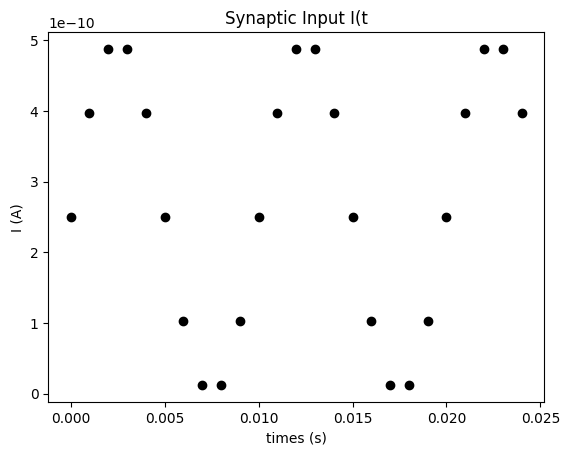

In [43]:
# Initialize step_end
step_end = 25

# Initialize the figure
plt.figure()
plt.title("Synaptic Input I(t")
plt.xlabel("times (s)")
plt.ylabel("I (A)")

for step in range(step_end):
    # Compute value of t
    t = step * dt
    
    # Compute value of i at this time step
    i = i_mean * (1 + np.sin((2*np.pi)/0.01*t))

    # Plot i (use 'ko' to get small black dots (short for color='k' and marker = 'o'))
    plt.plot(t, i, "ko",)


# Display the plot
plt.show()